In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score,mean_squared_error
from m5py import M5Prime, export_text_m5
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

In [2]:
df = pd.read_excel("D:\BTP\Yerli\combined.xlsx")
df

,Discharge,RF16(t-1),RF17(t-1),RF38(t-1),RF39(t-1),RF40(t-1),RF59(t-1),RF60(t-1),RF61(t-1),RF62(t-1),...,LT(t-1),c1(t-1),c2(t-1),QMOV(3),QMOV(4),QMOV(5),Q(t-1),Q(t-2),Q(t-3),BF(7avg)
0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,0.000000
1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.1,...,35.19770,0.000000,0.000000,0.066667,0.05,0.04,0.2,0.0,0.0,0.014286
2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.33585,0.000000,0.000000,0.133333,0.10,0.08,0.2,0.2,0.0,0.028571
3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.27155,0.000000,0.000000,0.200000,0.15,0.12,0.2,0.2,0.2,0.042857
4,0.2,0.0,0.6,1.3,1.6,0.0,0.6,0.0,0.0,0.0,...,33.59125,0.041725,0.143348,0.200000,0.20,0.16,0.2,0.2,0.2,0.057143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.14215,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,0.000000
17528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,32.86425,0.000000,0.004532,0.000000,0.00,0.00,0.0,0.0,0.0,0.000000
17529,0.0,0.0,0.1,4.3,1.2,0.0,0.0,0.0,0.0,0.0,...,33.11460,0.041967,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,0.000000
17530,0.0,0.0,0.2,0.8,0.2,0.0,0.0,0.0,0.0,0.0,...,33.75240,0.007262,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,0.000000


## Feature Importance

In [3]:
x=df.drop(columns = ["Discharge"])
y=df.Discharge
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)
k = model.feature_importances_
p = df.columns
l = []
for i in range(p.size-1):
    l.append([k[i],p[i+1]])
l.sort()
for m in l:
    print(m)

[0.003946606002183388, 'RF65(t-1)']
[0.004166508556919854, 'RF16(t-1)']
[0.004275354631549306, 'T5(t-1)']
[0.004335476368061813, 'T4(t-1)']
[0.004618689983133322, 'RF17(t-1)']
[0.004815865892545574, 'RF112(t-1)']
[0.004952108970490931, 'RF126(t-1)']
[0.005072872133349633, 'RF63(t-1)']
[0.00530461653367695, 'LT(t-1)']
[0.005327805139094794, 'RF96(t-1)']
[0.005341510140588746, 'T10(t-1)']
[0.005664977731775465, 'RF114(t-1)']
[0.0058237177286337306, 'RF84(t-1)']
[0.0058814646572533215, 'RF101(t-1)']
[0.006022964138125261, 'RF125(t-1)']
[0.0060440130222062455, 'RF116(t-1)']
[0.0062670317481407405, 'RF82(t-1)']
[0.006400668696392336, 'RF124(t-1)']
[0.006626455299322838, 'RF64(t-1)']
[0.006666130836762701, 'RF123(t-1)']
[0.006964745786672806, 'T11(t-1)']
[0.006985314750461842, 'RF98(t-1)']
[0.007281668798154204, 'RF95(t-1)']
[0.007382447929064661, 'RF62(t-1)']
[0.007385658532573405, 'RF83(t-1)']
[0.007863090235508838, 'RF117(t-1)']
[0.007914676925438137, 'Q(t-3)']
[0.008320036777721104, 'RF8

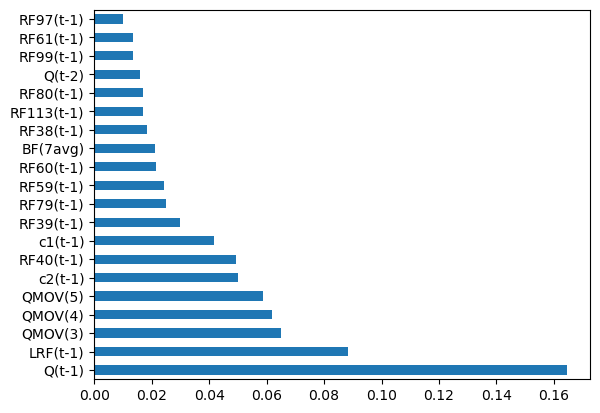

In [4]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [19]:
def pearson(X,Y):
    if len(X)==len(Y):
        Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
        Sum_x_squared = sum((X-X.mean())**2)
        Sum_y_squared = sum((Y-Y.mean())**2)       
        corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
    return corr

arr = []
for i in df:
    arr.append([pearson(df[i],df.Discharge),i])
arr.sort()
arr

[[-0.0642974592820453, 'T5(t-1)'],
 [-0.061756565257011724, 'T4(t-1)'],
 [-0.04285905373143674, 'LT(t-1)'],
 [-0.0351673217849028, 'T10(t-1)'],
 [-0.026797185223585998, 'T11(t-1)'],
 [0.20947811709454475, 'RF64(t-1)'],
 [0.22353712709053555, 'RF63(t-1)'],
 [0.24299824929227234, 'RF65(t-1)'],
 [0.30205453648583064, 'Q(t-3)'],
 [0.32924099756953173, 'RF16(t-1)'],
 [0.3457102910459197, 'RF112(t-1)'],
 [0.3476153922652924, 'RF126(t-1)'],
 [0.3486295678358295, 'BF(7avg)'],
 [0.35472110835908577, 'RF113(t-1)'],
 [0.376057809351431, 'RF17(t-1)'],
 [0.3891180548901693, 'RF123(t-1)'],
 [0.4093531305222304, 'RF115(t-1)'],
 [0.4194313171383547, 'RF95(t-1)'],
 [0.42059458761222207, 'Q(t-2)'],
 [0.43274724976065465, 'RF125(t-1)'],
 [0.43641104452965135, 'RF114(t-1)'],
 [0.43787267714074235, 'RF62(t-1)'],
 [0.4444463789020198, 'RF124(t-1)'],
 [0.45003789659003823, 'RF83(t-1)'],
 [0.45226271622775793, 'RF84(t-1)'],
 [0.45819177615800993, 'RF96(t-1)'],
 [0.4817515675008055, 'RF98(t-1)'],
 [0.490017428

## MLR for time series

In [6]:
ncr = [
    ["Q(t-1)"],
    ["Q(t-1)","Q(t-2)"],
    ["Q(t-1)","Q(t-3)"],
    ["Q(t-1)","Q(t-2)","Q(t-3)"]
]

for i in ncr:
    x1,x2,y1,y2 = train_test_split(df[i].values,df.Discharge.values,test_size=0.2,shuffle = False)
    model = linear_model.LinearRegression()
    model.fit(x1,y1)
    r = model.score(x2,y2)
    print(i,end = ": ")
    print(r)

['Q(t-1)']: 0.5195073666526877
['Q(t-1)', 'Q(t-2)']: 0.535839276045323
['Q(t-1)', 'Q(t-3)']: 0.5158092567511945
['Q(t-1)', 'Q(t-2)', 'Q(t-3)']: 0.5382217315619569


## M5 for time series

In [7]:
ncr = [
    ["Q(t-1)"],
    ["Q(t-1)","Q(t-2)"],
    ["Q(t-1)","Q(t-3)"],
    ["Q(t-1)","Q(t-2)","Q(t-3)"]
]

for i in ncr:
    x1,x2,y1,y2 = train_test_split(df[i].values,df.Discharge.values,test_size=0.2,shuffle = False)
    model = M5Prime(use_smoothing = True, use_pruning = True,random_state = 42)
    model.fit(x1,y1)
    r = model.score(x2,y2)
    print(i,end = ": ")
    print(r)

['Q(t-1)']: 0.5296632335082387
['Q(t-1)', 'Q(t-2)']: 0.45000827276582533
['Q(t-1)', 'Q(t-3)']: 0.42584597949369485
['Q(t-1)', 'Q(t-2)', 'Q(t-3)']: 0.4429394125500733


## M5 for combined

In [22]:
ncr = [
    ['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'RF60(t-1)'],
    ['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)'],
    ['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)'], # 0.7517930854602023
    ['Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)'], # 0.7505631305617967
    ['Q(t-1)', 'Q(t-3)', 'c2(t-1)', 'RF60(t-1)', 'BF(7avg)'],
    ['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c2(t-1)', 'RF60(t-1)', 'BF(7avg)'],
    ['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)'],
    ['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)'],
    ['Q(t-1)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)', 'QMOV(4)'],
    ['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)', 'QMOV(4)'],
    ['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)', 'QMOV(4)'],
]

for i in ncr:
    x1,x2,y1,y2 = train_test_split(df[i].values,df.Discharge.values,test_size=0.2,shuffle = False)
    model = M5Prime(use_smoothing = True, use_pruning = True,random_state = 42)
    model.fit(x1,y1)
    predicted = model.predict(x2)
    print(i,end = ": ")
    print(model.score(x2,y2), pearson(predicted,y2), mean_squared_error(predicted,y2,squared = False))

['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'RF60(t-1)']: 0.7463081083027091 0.8651531152867815 105.7191622087565
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)']: 0.7452541129768382 0.8635718547917997 105.938546452632
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.7517930806832641 0.8674888401987072 104.5700610383767
['Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.7505631444558911 0.8673346388447672 104.82882813854243
['Q(t-1)', 'Q(t-3)', 'c2(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.7581527663014095 0.8716771494060359 103.22169385110449
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c2(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.7518437562971467 0.8671509411919374 104.55938562578788
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)']: 0.7522252937820962 0.8678887230456646 104.47897525587354
['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)']: 0.7528024485568159 0.8685970036342396 104.35722010052065
['Q(t-1)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg

In [25]:
for i in ncr:
    x1,x2,y1,y2 = train_test_split(df[i].values,df.Discharge.values,test_size=0.2,shuffle = False)
    model = M5Prime(use_smoothing = False, use_pruning = True,random_state = 42)
    model.fit(x1,y1)
    predicted = model.predict(x2)
    print(i,end = ": ")
    print(model.score(x2,y2), pearson(predicted,y2), mean_squared_error(predicted,y2,squared = False))

['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'RF60(t-1)']: 0.6619631778077693 0.8254287368357457 122.03444337171437
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)']: 0.4786649445442829 0.7406171742360773 151.55102698165595
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.48267668761914795 0.7239638940898214 150.96679815630213
['Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.44949746051700856 0.7153322817346335 155.7327966596923
['Q(t-1)', 'Q(t-3)', 'c2(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.6066995638124822 0.7947570459397588 131.63234960822257
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c2(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.4954440019793859 0.7319183008025044 149.0922627626472
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)']: 0.6570227308624016 0.8177761139030887 122.92298231976615
['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)']: 0.6212886535584287 0.797180260709837 129.16789375789682
['Q(t-1)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7

In [26]:
for i in ncr:
    x1,x2,y1,y2 = train_test_split(df[i].values,df.Discharge.values,test_size=0.2,shuffle = False)
    model = M5Prime(use_smoothing = True, use_pruning = False,random_state = 42)
    model.fit(x1,y1)
    predicted = model.predict(x2)
    print(i,end = ": ")
    print(model.score(x2,y2), pearson(predicted,y2), mean_squared_error(predicted,y2,squared = False))

['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'RF60(t-1)']: 0.7408383676826955 0.860793540752581 106.85276695883094
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)']: 0.7420543747075945 0.8617704709014637 106.60179136582406
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.7501363448857018 0.8665978179574658 104.91847362526106
['Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.7497502299857723 0.8669863821166357 104.99950771509378
['Q(t-1)', 'Q(t-3)', 'c2(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.7455357547578412 0.8664947888240331 105.87996852518107
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c2(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.7416121305368224 0.8612196895718799 106.6931358713462
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)']: 0.7593405907348513 0.8714332929108991 102.96789692572564
['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)']: 0.7702650532296531 0.8776769291308134 100.60369953155958
['Q(t-1)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7a

In [27]:
for i in ncr:
    x1,x2,y1,y2 = train_test_split(df[i].values,df.Discharge.values,test_size=0.2,shuffle = False)
    model = M5Prime(use_smoothing = False, use_pruning = False,random_state = 42)
    model.fit(x1,y1)
    predicted = model.predict(x2)
    print(i,end = ": ")
    print(model.score(x2,y2), pearson(predicted,y2), mean_squared_error(predicted,y2,squared = False))

['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'RF60(t-1)']: 0.3660254341766769 0.705618975625137 167.12304381810804
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)']: 0.46221535036356654 0.7174812772705106 153.9233902003295
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.4224479824494465 0.6875240788936107 159.5129592504557
['Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.4756189357977414 0.7131029664167702 151.99311640706352
['Q(t-1)', 'Q(t-3)', 'c2(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.3770086552500045 0.7775606209505322 165.66906680006633
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c2(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.3492191472114643 0.6726664626647474 169.32372057997847
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)']: 0.5950136273719744 0.7767224367739882 133.5735979565787
['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)']: 0.611599733410614 0.7881294856472459 130.8097690984449
['Q(t-1)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)

## plot for best combination

In [30]:
i = ['Q(t-1)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)', 'QMOV(4)']
x1,x2,y1,y2 = train_test_split(df[i].values,df.Discharge.values,test_size=0.2,shuffle = False)
model = M5Prime(use_smoothing = True, use_pruning = True,random_state = 42)
model.fit(x1,y1)

M5Prime(leaf_model=DeNormalizableLinearRegression(), random_state=42,
        use_pruning=False, use_smoothing='installed')

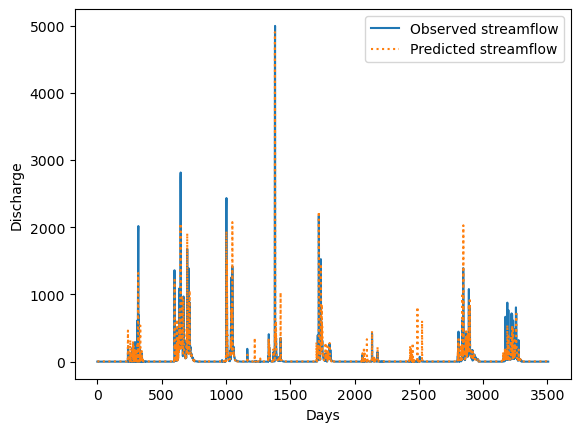

In [31]:
predicted = model.predict(x2)
sz = y2.size
plt.plot(range(sz), y2)
plt.plot(range(sz), predicted,linestyle = 'dotted')
plt.xlabel('Days')
plt.ylabel('Discharge')
plt.legend(["Observed streamflow", "Predicted streamflow"])
plt.show()

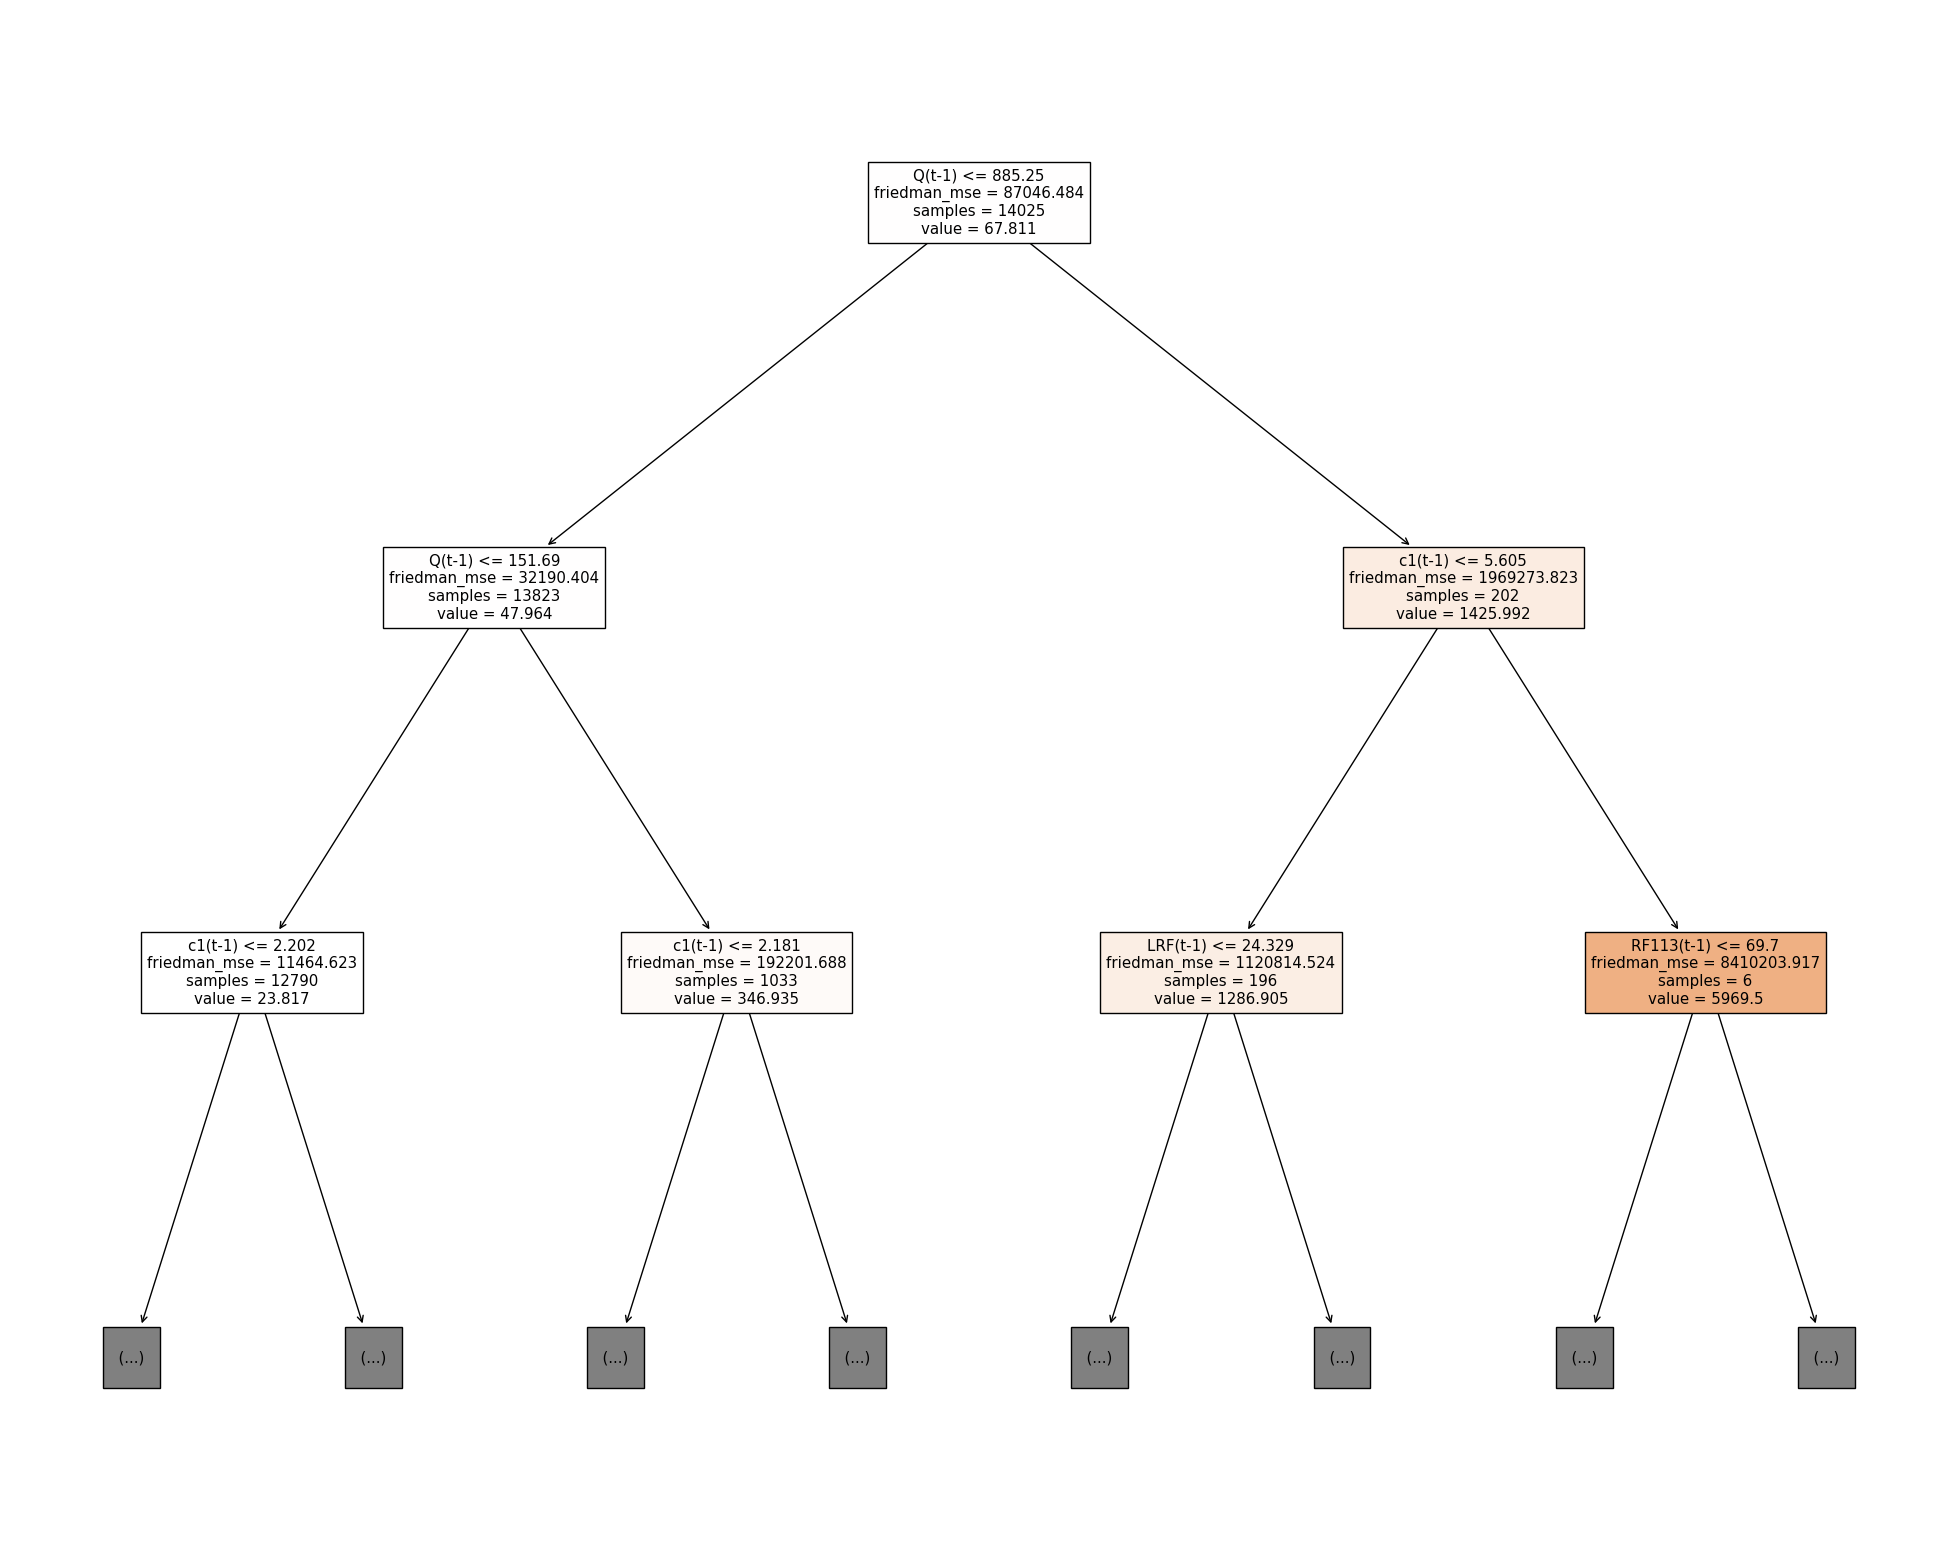

In [34]:
# Plot the top few levels of the decision tree
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(model, 
              feature_names=i,
              class_names=i,  
              filled=True,
              max_depth=2)  

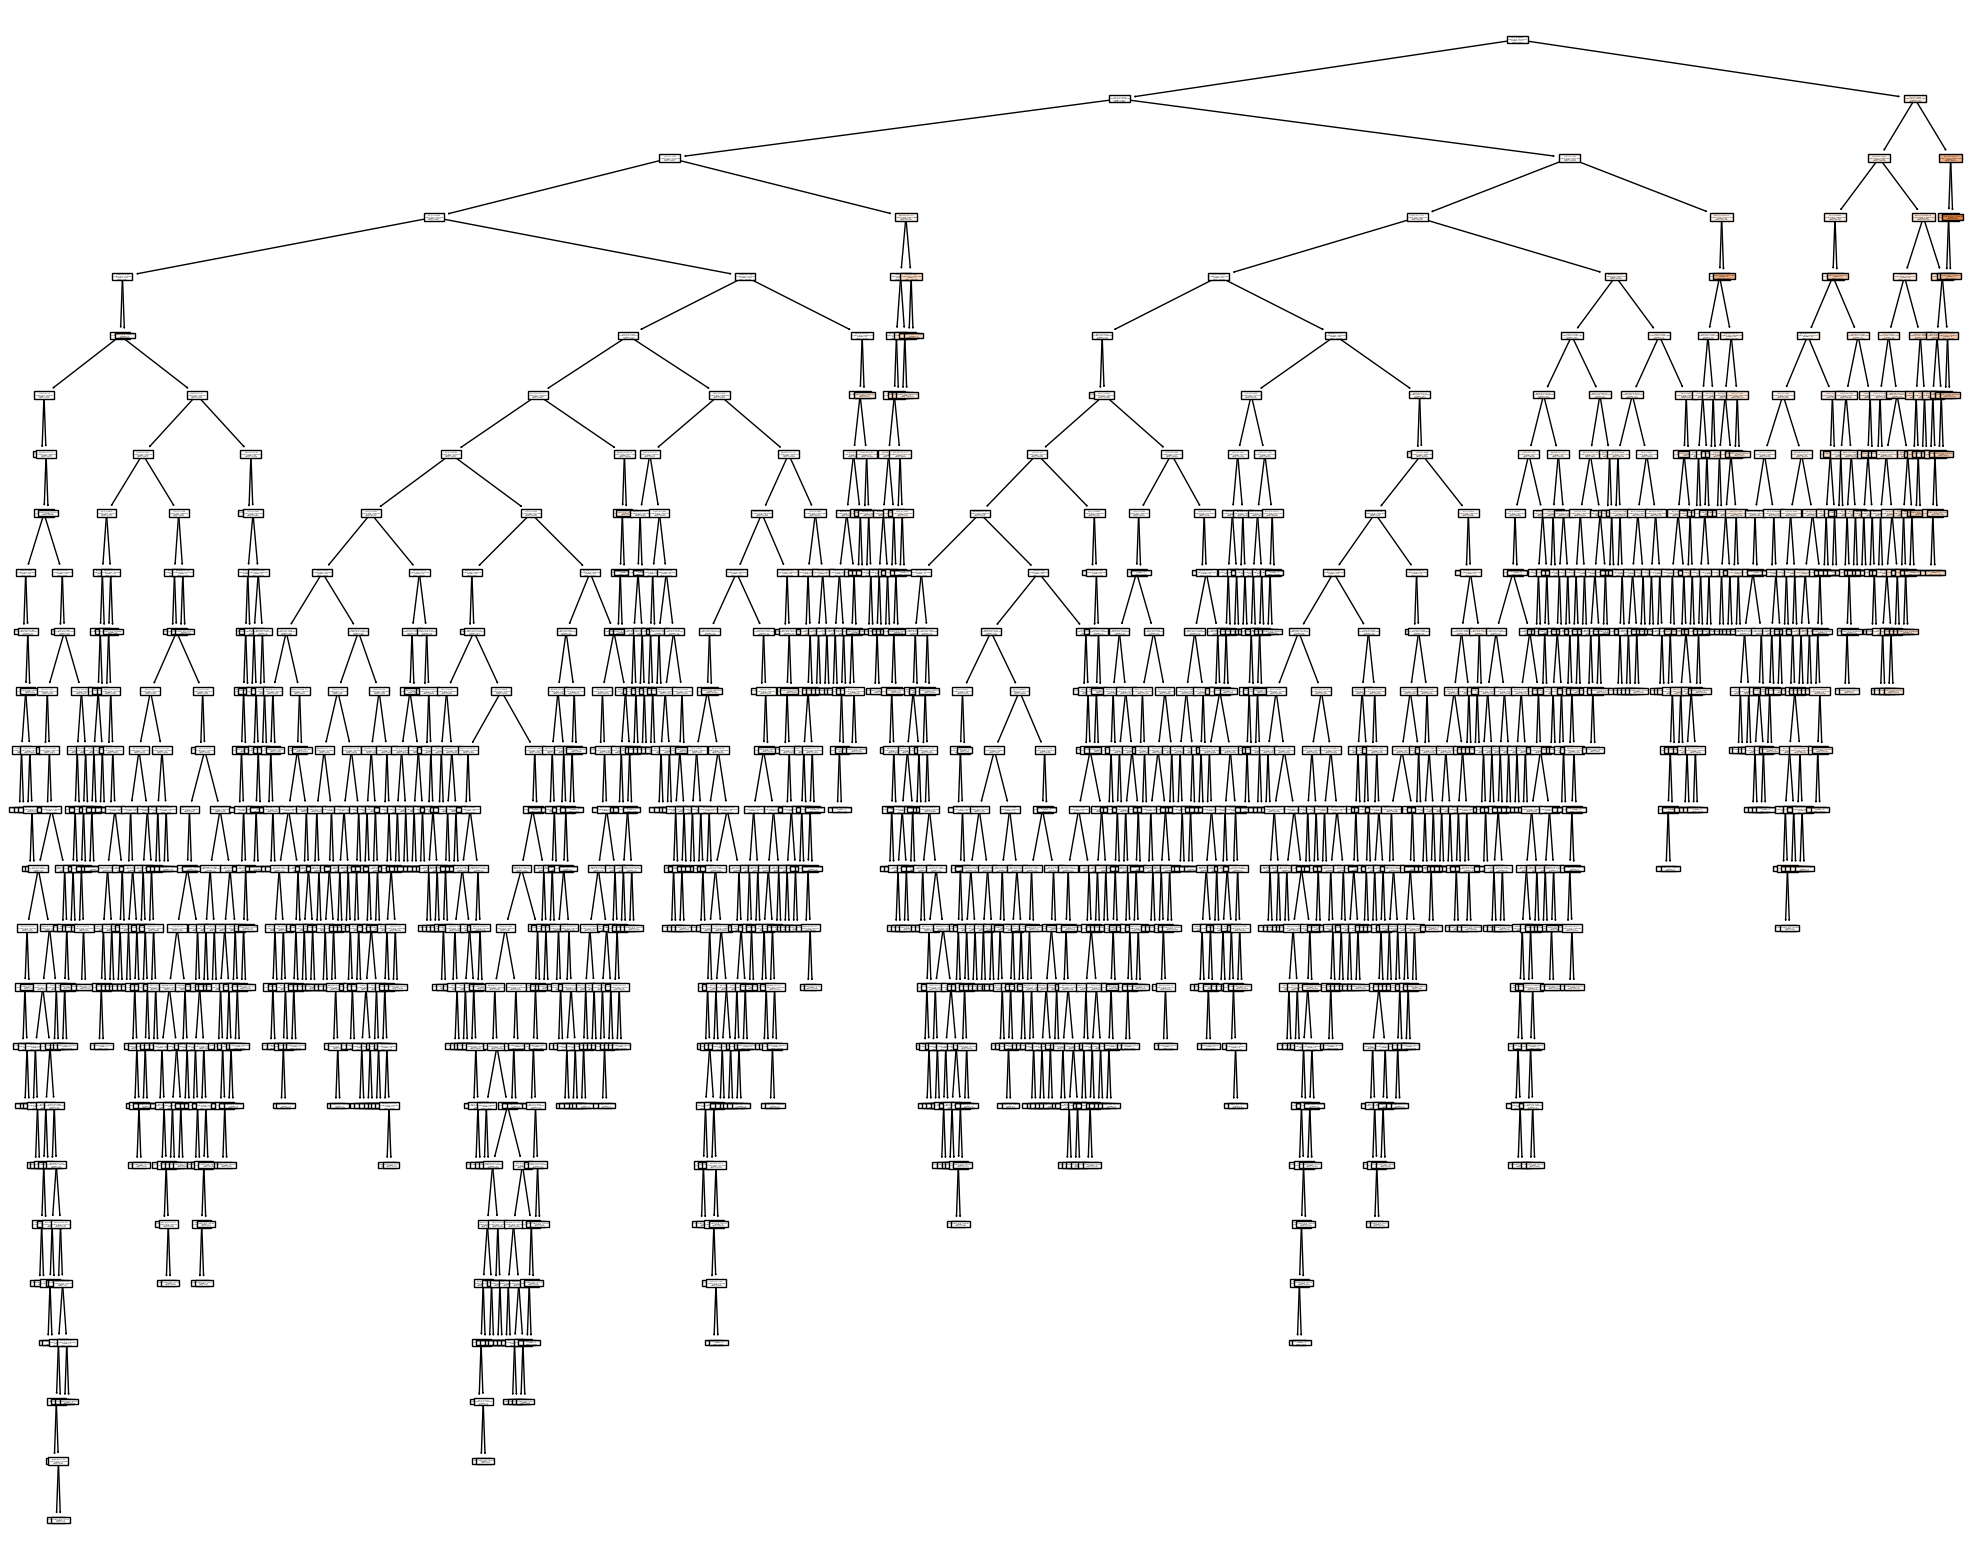

In [35]:
# Plot the top few levels of the decision tree
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(model, 
              feature_names=i,
              class_names=i,  
              filled=True) 